# Analysis and insights Python script: Solar power plant generation analysis
## Part 1: Data quality check and data mart creation

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

We have 4 data files:

- Plant 1, generation data
- Plant 1, sensors' data
- Plant 2, generation data
- Plant 2, sensors' data

### Load data from plant 1 - generation data

In [2]:
p1g = pd.read_csv("data/Plant_1_Generation_Data.csv")
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Load data from plant 1 - sensors' data

In [3]:
p1w = pd.read_csv("data/Plant_1_Weather_Sensor_Data.csv")
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Load data from plant 2 - generation data

In [4]:
p2g = pd.read_csv("data/Plant_2_Generation_Data.csv")
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


### Load data from plant 2 - sensors' data

In [5]:
p2w = pd.read_csv("data/Plant_2_Weather_Sensor_Data.csv")
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


## Data quality

### Data quality plant 1 - generation data

Let's start with a general overview of the data.

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


There are no nulls.

We should change DATE_TIME to a datetime data type.

In [7]:
p1g["DATE_TIME"] = pd.to_datetime(p1g["DATE_TIME"], dayfirst=True)

We can check the conversion is correctly applied.

In [8]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Let's check that the PLANT_ID is unique.

In [9]:
p1g["PLANT_ID"].unique()

array([4135001], dtype=int64)

We can switch to an easier-to-read identifier instead:

In [10]:
p1g["PLANT_ID"] = p1g["PLANT_ID"].replace(4135001, "p1")

Let's run now a quick statistical analysis on the numerical variables.

In [11]:
p1g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


Let's change the scientific notation to a standard one, so we can read the data easier.

In [12]:
pd.options.display.float_format = '{:15.2f}'.format

In [13]:
p1g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.00,3147.43,4036.46,0.00,0.00,429.00,6366.96,14471.12
AC_POWER,68778.00,307.80,394.40,0.00,0.00,41.49,623.62,1410.95
DAILY_YIELD,68778.00,3295.97,3145.18,0.00,0.00,2658.71,6274.00,9163.00
TOTAL_YIELD,68778.00,6978711.76,416271.98,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00


The AC power values look to be around 10 times lower than the DC ones. This is a huge difference.

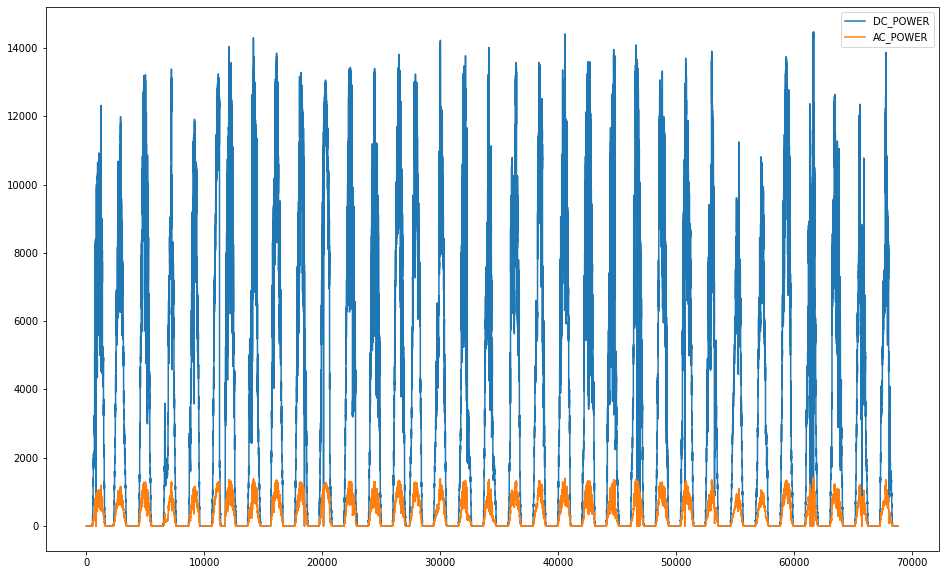

In [14]:
p1g[["DC_POWER","AC_POWER"]].plot(figsize=(16,10));

Having such a noticeable difference between DC and AC generation, let's see first if both variables are correlated and then we'll check the mean ratio between them.

In [15]:
p1g["DC_POWER"].corr(p1g["AC_POWER"])

0.9999962553331395

In [16]:
(p1g["DC_POWER"] / p1g["AC_POWER"]).describe().T

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

We can see that the inverters are working with a 10% efficiency when transforming DC into AC, which is a very low performance.

But we will analyse this in the Analysis and Insights section.



Let's analyse the categorical variable, which is the inverter id.

In [17]:
p1g["SOURCE_KEY"].nunique()

22

In [18]:
p1g["SOURCE_KEY"].value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

Conclusions:

    * There are 22 inverters in plant 1.
    * They all have the same amount of reading but they are not exactly the same.
    * That might be because of maintenance or just because some of them have some communication problems. But we will analyse that later.


Now let's analyse DAILY_YIELD and TOTAL_YIELD. According to the documentation, TOTAL_YIELD is the total power generated by every inverter till that point of time. But we don't know if DAILY_YIELD is the daily power generated by every inverter or by every plant.

If DAILY_YIELD is the power generated by plant, then there should not be any difference between the different inverters at the same time. If there is any difference, then the DAILY_YIELD is the power generated by every inverter.

We will just take a sample of inverters to check that.

In [19]:
selection = list(p1g["SOURCE_KEY"].unique()[:5])
selection

['1BY6WEcLGh8j5v7',
 '1IF53ai7Xc0U56Y',
 '3PZuoBAID5Wc2HD',
 '7JYdWkrLSPkdwr4',
 'McdE0feGgRqW7Ca']

In [20]:
temp = p1g[p1g["SOURCE_KEY"].isin(selection)].set_index("DATE_TIME")
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...
2020-06-17 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,5521.00,6485319.00
2020-06-17 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,6034.00,6433566.00
2020-06-17 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,6052.00,7237425.00


We can already see that DAILY_YIELD is different for each inverter. But let's plot it to make sure that all records fulfil that condition.

In [21]:
temp = temp.loc["2020-06-01":"2020-06-05"]
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-06-01 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,829.00,6377931.00
2020-06-01 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6311432.00
2020-06-01 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7115304.00
2020-06-01 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,730.38,7727821.00
2020-06-01 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7286760.00
...,...,...,...,...,...,...
2020-06-05 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,7162.00,6412542.00
2020-06-05 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6348557.00
2020-06-05 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7152486.00


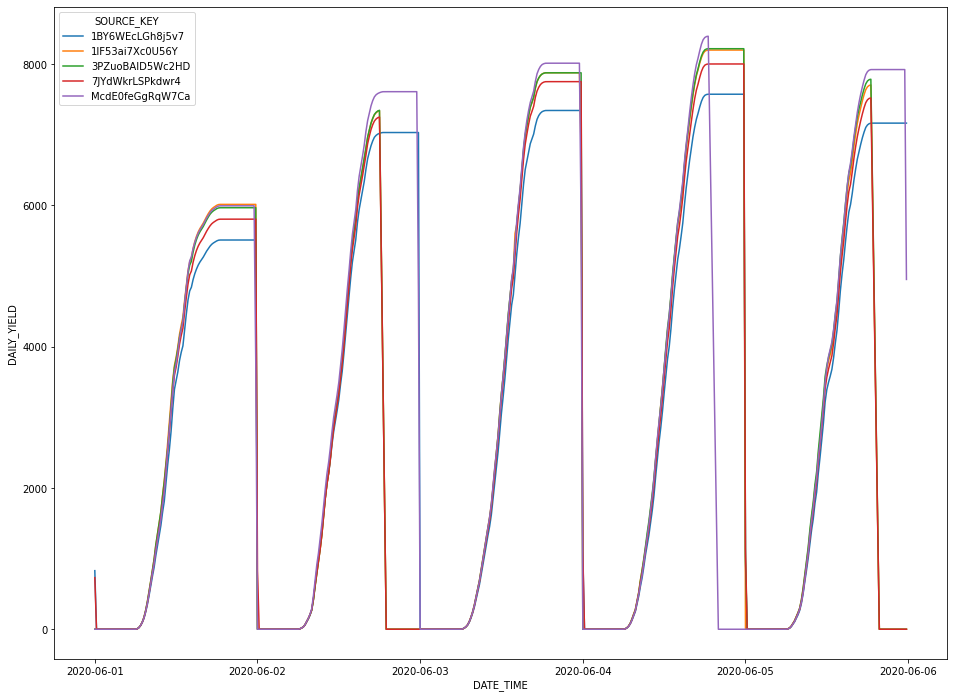

In [22]:
plt.figure(figsize=(16,12))
sns.lineplot(data=temp.reset_index(), x=temp.index, y="DAILY_YIELD", hue="SOURCE_KEY");

We can conclude that DAILY_YIELD is the daily power generated by inverter.

Let's analyse the timeframe of the collected data and if there are constant readings for all of them.

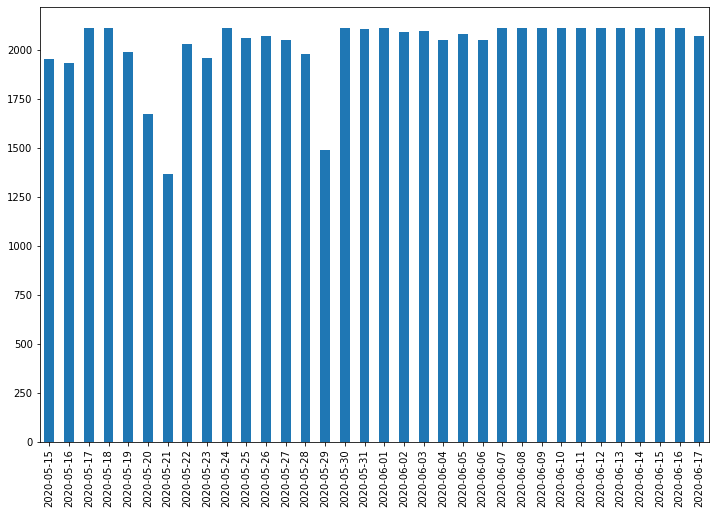

In [23]:
p1g["DATE_TIME"].dt.date.value_counts().sort_index().plot.bar(figsize=(12,8));

Conclusions:

    * The data were recorded between May 15th 2020 and June 17th 2020
    * We have data for all days (no missing day without data)
    * There are some days like 21/05 or 29/05 that have less records
    * Then the dataset is not completely balanced.

### Data quality plant 1 - sensors' data

In [24]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


Fix DATE_TIME data type.

In [25]:
p1w["DATE_TIME"] = pd.to_datetime(p1w["DATE_TIME"])
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [26]:
p1w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62,22.17,0.00


Change the power plant name.

In [27]:
p1w["PLANT_ID"] = p1w["PLANT_ID"].replace(4135001, "p1")
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,p1,HmiyD2TTLFNqkNe,22.15,21.48,0.00
3178,2020-06-17 23:00:00,p1,HmiyD2TTLFNqkNe,22.13,21.39,0.00
3179,2020-06-17 23:15:00,p1,HmiyD2TTLFNqkNe,22.01,20.71,0.00
3180,2020-06-17 23:30:00,p1,HmiyD2TTLFNqkNe,21.97,20.73,0.00


Check the numerical variables

In [28]:
p1w.describe().T

,count,mean,std,min,25%,50%,75%,max
AMBIENT_TEMPERATURE,3182.00,25.53,3.35,20.40,22.71,24.61,27.92,35.25
MODULE_TEMPERATURE,3182.00,31.09,12.26,18.14,21.09,24.62,41.31,65.55
IRRADIATION,3182.00,0.23,0.30,0.00,0.00,0.02,0.45,1.22


Nothing strange here.

We can check now the categorical variable, which in this case is the sensor id.

In [29]:
p1w["SOURCE_KEY"].nunique()

1

There is only 1 sensor by plant.

What is the timeframe of the collected data and how many readings are there?

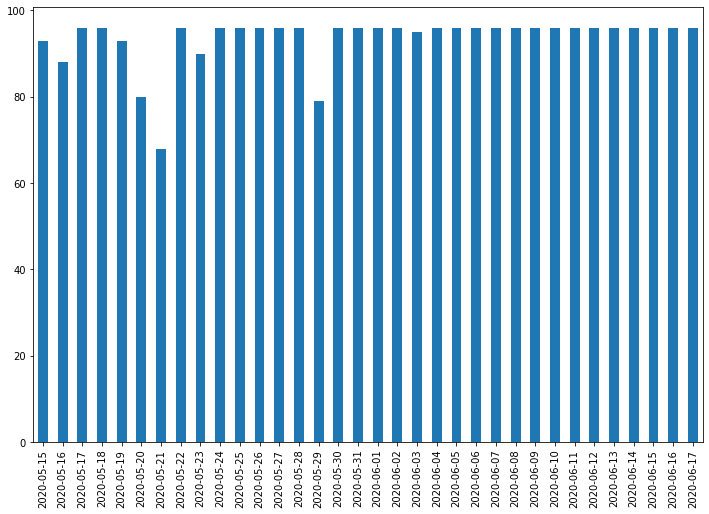

In [37]:
p1w["DATE_TIME"].dt.date.value_counts().sort_index().plot.bar(figsize=(12,8));

Conclusions:

    * The data were recorded between May 15th 2020 and June 17th 2020
    * We have data for all days (no missing day without data)
    * There are some days like 21/05 or 29/05 that have less records
    * Then the dataset is not completely balanced.

### Data quality plant 2 - generation data

In [42]:
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


In [44]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


We will repeat the same exact process than with plant 1.

In [40]:
p2g["DATE_TIME"] = pd.to_datetime(p2g["DATE_TIME"])

In [45]:
p2g["PLANT_ID"] = p2g["PLANT_ID"].replace(4136001, "p2")

In [46]:
p2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p2,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15,p2,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15,p2,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15,p2,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15,p2,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00


In [47]:
p2g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,67698.00,246.70,370.57,0.00,0.00,0.00,446.59,1420.93
AC_POWER,67698.00,241.28,362.11,0.00,0.00,0.00,438.22,1385.42
DAILY_YIELD,67698.00,3294.89,2919.45,0.00,272.75,2911.00,5534.00,9873.00
TOTAL_YIELD,67698.00,658944788.42,729667771.07,0.00,19964944.87,282627587.00,1348495113.00,2247916295.00


In this case the DC and AC values are more similar.

Let's compute the ratio.

In [48]:
(p2g["DC_POWER"] / p2g["AC_POWER"]).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

For plant 2 the efficiency values are very close to 1 (as we would expect for regular performance from  a DC-AC inverter)

Checking the categorical variable, the inverters ids.

In [49]:
p2g["SOURCE_KEY"].nunique()

22

In [51]:
p2g["SOURCE_KEY"].value_counts()

xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: SOURCE_KEY, dtype: int64

Conclusions:

    * There are 22 inverters in plant 2.
    * They all have the same amount of reading but they are not exactly the same. 
    * 4 of these inverters have around 800 less readings.
    * We will analyse this later.

Let's see the amount of readings over time.

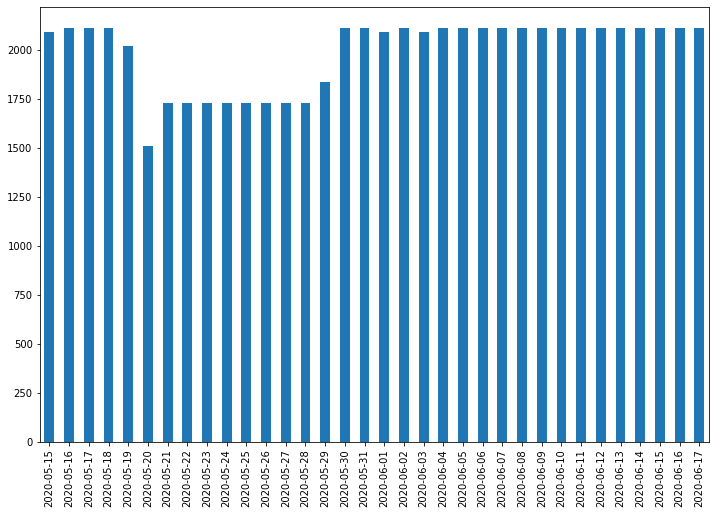

In [53]:
p2g["DATE_TIME"].dt.date.value_counts().sort_index().plot.bar(figsize=(12,8));

Conclusions:

    * The data were recorded between May 15th 2020 and June 17th 2020
    * We have data for all days (no missing day without data)
    * There are some days like 21/05 and other days that more data are missing
    * Then the dataset is not completely balanced.

### Data quality plant 2 - sensors' data

In [54]:
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [55]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


We are going to follow the same steps as with the sensors' data from plant 1.

In [56]:
p2w["DATE_TIME"] = pd.to_datetime(p2w["DATE_TIME"])
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [57]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


In [59]:
p2w["PLANT_ID"] = p2w["PLANT_ID"].replace(4136001, "p2")
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p2,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,p2,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,p2,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,p2,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,p2,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [61]:
p2w.describe().T

,count,mean,std,min,25%,50%,75%,max
AMBIENT_TEMPERATURE,3259.00,28.07,4.06,20.94,24.60,26.98,31.06,39.18
MODULE_TEMPERATURE,3259.00,32.77,11.34,20.27,23.72,27.53,40.48,66.64
IRRADIATION,3259.00,0.23,0.31,0.00,0.00,0.02,0.44,1.10


In [62]:
p2w["SOURCE_KEY"].nunique()

1

There is only 1 sensor for plant 2, as with plant 1.

Let's check the amount of readings and we are finished.

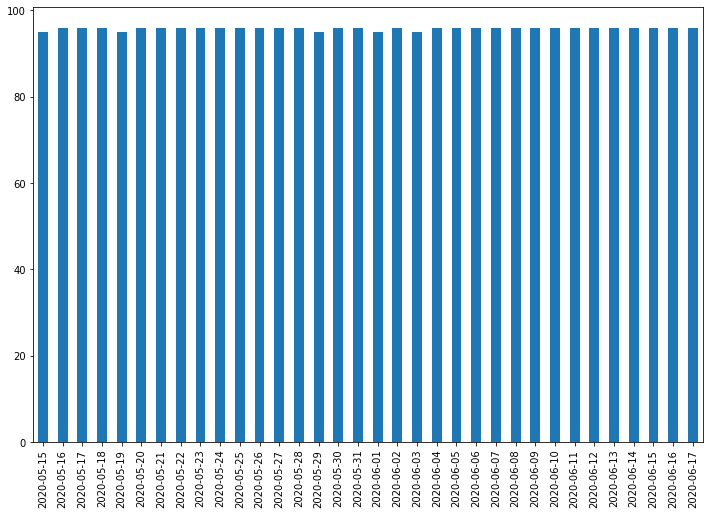

In [63]:
p2w["DATE_TIME"].dt.date.value_counts().sort_index().plot.bar(figsize=(12,8));

Conclusions:

    * The data were recorded between May 15th 2020 and June 17th 2020
    * We have data for all days (no missing day without data)
    * The dataset is not completely balanced but there are less missing values compared to the other datasets.
    

### Notes for posterior data analysis

- In plant 1 the inverters are only transforming 10% of the DC into AC which is a very low efficiency value.
- In plant 2 the efficiency is way closer to 100%.
- The datasets are not completely balanced, since there are days with less readings. There are also differences of readings by the inverters.

## Creating the data mart

First we are going to concatenate the generation data for both power plants.

Then, we are going to do the same with the sensors' data.

Finally, we are going to join both datasets by the plant id variable.

### Concatenate generation datasets

In [69]:
gener = pd.concat([p1g,p2g], axis=0)
gener

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


We are going to rename the variables' names.

In [71]:
gener.columns = ["timestamp","plant","inverter_id","kw_dc","kw_ac","kw_day","kw_total"]
gener

,timestamp,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


It is a good practice to do what is called a coherence analysis to make sure there is a relationship between temporal variables. In this case, variables kw_day and kw_total are supposed to be directly related to kw_dc and kw_ac.

In [72]:
gener2 = gener.copy()

Let's create a date variable to aggregate the variables by date.

In [73]:
gener2["date"] = gener2["timestamp"].dt.date
gener2

,timestamp,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,date
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,2020-05-15
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,2020-05-15
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,2020-05-15
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,2020-05-15
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,2020-06-17
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,2020-06-17
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,2020-06-17
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,2020-06-17


The sum by plant, date and inverter (kw_dc or kw_ac) should be the same as the maximum value for kw_day.

In [78]:
gener2 = gener2.groupby(["plant","date","inverter_id"]).agg({"kw_dc":sum, 
                                                    "kw_ac":sum, "kw_day":max,
                                                    "kw_total":max}).reset_index()
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
1,p1,2020-05-15,1IF53ai7Xc0U56Y,258911.11,25343.29,6357.00,6190002.00
2,p1,2020-05-15,3PZuoBAID5Wc2HD,254766.05,24937.70,6274.00,6994033.00
3,p1,2020-05-15,7JYdWkrLSPkdwr4,250608.34,24533.91,6116.00,7609076.00
4,p1,2020-05-15,McdE0feGgRqW7Ca,264030.98,25840.63,6471.00,7165435.00
...,...,...,...,...,...,...,...
1459,p2,2020-06-17,q49J1IKaHRwDQnt,17001.51,16655.15,4157.00,520758.00
1460,p2,2020-06-17,rrq4fwE8jgrTyWY,16073.93,15748.92,3931.00,121131356.00
1461,p2,2020-06-17,vOuJvMaM2sgwLmb,17710.00,17345.44,4322.00,2427691.00
1462,p2,2020-06-17,xMbIugepa2P7lBB,17211.23,16860.38,5502.00,106896394.00


Just sort values by plant, inverter id and date to analyse the data.

In [81]:
gener2 = gener2.sort_values(["plant","inverter_id","date"])
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00
...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00


- kw_day does not match kw_dc neither kw_ac.

Let's now check if kw_day and kw_total are actually related. The daily increment of kw_total should match with the maximum value of kw_day from the previous day.

In [84]:
gener2["lag1"] = gener2.groupby(["plant","inverter_id"])["kw_total"].shift(1)
gener2["increment"] = gener2["kw_total"] - gener2["lag1"]
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increment
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00


In [86]:
gener2["match"] = gener2["increment"] == gener2["kw_day"]
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increment,match
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN,False
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00,True
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00,True
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00,True
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00,True
...,...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00,False
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00,False
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00,False
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00,False


Check for plant 1.

In [93]:
gener2[gener2["plant"] == "p1"]["match"].value_counts()

True     665
False     83
Name: match, dtype: int64

Apparently there are 83 records that do not match, but some of these are for shifting the data 1 timestamp. If we drop tha NaN values:

In [98]:
gener2[(gener2["plant"] == "p1") & (gener2["match"] == False)].dropna()["match"].value_counts()

False    61
Name: match, dtype: int64

There are 61 values that do not match. Is there a big difference?

In [117]:
gener2["difference"] = (abs(gener2["kw_day"] - gener2["increment"]) / gener2["kw_day"]) * 100
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increment,match,difference
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN,False,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00,True,0.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00,True,0.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00,True,0.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00,True,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00,False,0.72
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00,False,3.01
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00,False,15.52
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00,False,11.72


In [118]:
temp = gener2[(gener2["plant"] == "p1") & (gener2["match"] == False)].dropna()[["date","difference"]]
temp

,date,difference
242,2020-05-26,0.06
89,2020-05-19,0.84
133,2020-05-21,0.04
243,2020-05-26,0.01
397,2020-06-02,0.03
...,...,...
283,2020-05-27,0.01
284,2020-05-27,0.03
460,2020-06-04,0.00
285,2020-05-27,0.03


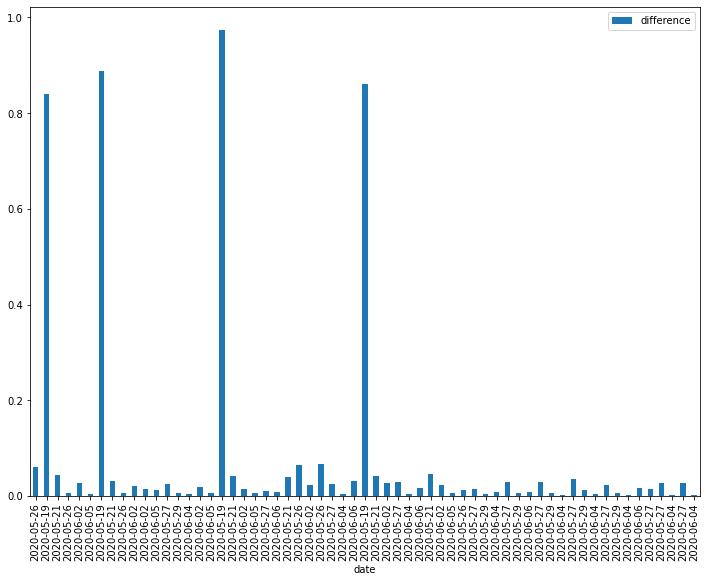

In [119]:
temp.plot.bar(x="date",y="difference", figsize=(12,9));

Conclusions:

    * There are 61 values that do not match the increment of kw_day and the daily kw_total values.
    * The percentage difference is less than 1% for all of them. We are going to assume they are directly related.
    * kw_day and kw_total are not coherently related to kw_dc and kw_ac.
    * Then we have two variables' blocks to use: kw_dc with kw_ac or kw_day with kw_total, but we cannot mix them.

Check for plant 2.

In [120]:
gener2[gener2["plant"] == "p2"]["match"].value_counts()

True     504
False    212
Name: match, dtype: int64

In [123]:
gener2[(gener2["plant"] == "p2") & (gener2["match"] == False)].dropna()["match"].value_counts()

False    190
Name: match, dtype: int64

In [124]:
gener2["difference"] = (abs(gener2["kw_day"] - gener2["increment"]) / gener2["kw_day"]) * 100
gener2

,plant,date,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increment,match,difference
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN,False,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00,True,0.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00,True,0.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00,True,0.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00,True,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00,False,0.72
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00,False,3.01
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00,False,15.52
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00,False,11.72


In [125]:
temp = gener2[(gener2["plant"] == "p2") & (gener2["match"] == False)].dropna()[["date","difference"]]
temp

,date,difference
836,2020-05-19,74.23
880,2020-05-21,2.89
916,2020-05-23,1.77
934,2020-05-24,52.16
1006,2020-05-28,60.75
...,...,...
1375,2020-06-13,0.72
1397,2020-06-14,3.01
1419,2020-06-15,15.52
1441,2020-06-16,11.72


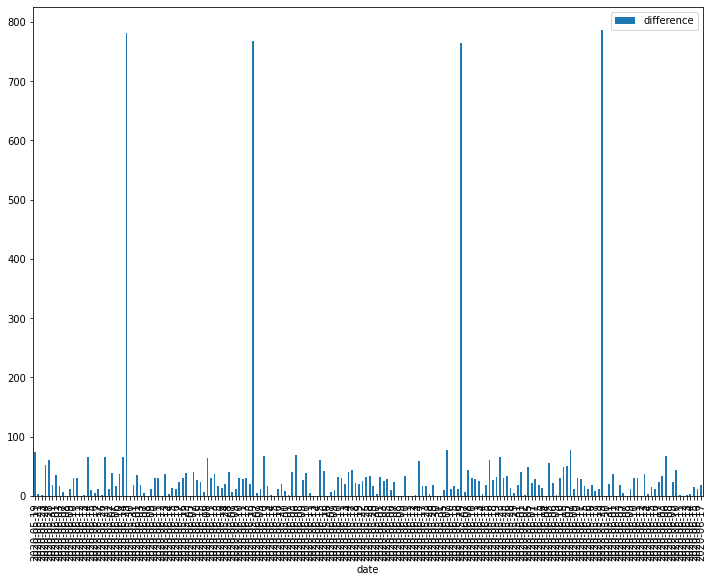

In [126]:
temp.plot.bar(x="date",y="difference", figsize=(12,9));

Conclusions:

    * The mismatch here is very significant. Probably due to some lacking values from some inverters.
    * We will stick to the same conclusions from plant 1 analysis, but we will take this into account this in the analysis section.

### Concatenate sensors' data